# Notebook layout

Note the user can activate 'Run All', however, some parts of the code have been commented out due to the requirement of all the supplied data for the particular code - which is confidential in nature and cannot be uploaded to a shared drive. The processed data, that retains confidentiality, has been loaded into the code at various stages to allow notebook functionality.

The notebook contains the following sections that refer to the Modelling report layout for Group 13:
- 1.6 PCS Check
    - 1.6.3 Model Evaluation

In [1]:
import os
os.path.abspath(os.curdir)
os.chdir("..")
REPO_PATH = os.path.abspath(os.curdir)
FIGURE_PATH = REPO_PATH + '/reports/figures/'
print(FIGURE_PATH)

MODEL_PATH = REPO_PATH + '/models/'
print(MODEL_PATH)

/Users/connormcdonald/Desktop/Masters/MIT808/mit808-2022-project-significant-outliers-1/reports/figures/
/Users/connormcdonald/Desktop/Masters/MIT808/mit808-2022-project-significant-outliers-1/models/


In [2]:
#General Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from functions import *

#Model Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, silhouette_score, roc_curve

### 1.6.3 Model Evaluation

In [5]:
#Reading in data
df1 = read_from_drive('https://drive.google.com/file/d/1XE0ta9-okF0_MRJ5ft1_T0IrVMxf44Xx/view?usp=sharing')
df1['lepto_bin'] = pd.Series(np.where(df1.Lepto_Y_N.values == 'Yes', 1, 0),df1.index)

#Reading data in
df2 = read_from_drive('https://drive.google.com/file/d/1GvzuS_mQkL7bBGu8jRn1IOehLcGX__zf/view?usp=sharing')
df2['lepto_bin'] = pd.Series(np.where(df2.Lepto_Y_N.values == 'Yes', 1, 0),df2.index)

In [6]:
#standardizing data
df1[['Timeframe', 'rainfall', 'temperature_max', 'temperature_min', 'temperature_diff']]= StandardScaler().fit_transform(df1[['Timeframe', 'rainfall', 'temperature_max', 'temperature_min', 'temperature_diff']])

df2[['Timeframe', 'rainfalldiff', 'rainfall', 'rainfallavg', 'temperature_maxdiff', 'temperature_max', 'temperature_maxavg', 'temperature_mindiff', 'temperature_min', 'temperature_minavg', 'temperature_diffdiff', 'temperature_diff', 'temperature_diffavg']]= StandardScaler().fit_transform(df2[['Timeframe', 'rainfalldiff', 'rainfall', 'rainfallavg', 'temperature_maxdiff', 'temperature_max', 'temperature_maxavg', 'temperature_mindiff', 'temperature_min', 'temperature_minavg', 'temperature_diffdiff', 'temperature_diff', 'temperature_diffavg']])

In [7]:
#Creating subsets

X1 = df1.iloc[:, [2,6,7,8,9]]
X1a = df1.iloc[:, [2,6,7,8,9,10]]
Y1 = df1.iloc[:, 10]

X2 = df2.iloc[:, [2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]].values
X2a = df2.iloc[:, [2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]].values
Y2 = df2.iloc[:, [18]].values

In [8]:
#splitting into training and test set

x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.25, random_state=0)
scale_pos_weight1 = float(len(Y1)/sum(Y1))


x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.25, random_state=0)
scale_pos_weight2 = float(len(Y2)/sum(Y2))

In [9]:
#Loading models

svm1 = pickle.load(open(f'{MODEL_PATH}lepto_svm1.pickle', 'rb'))
xg1 = pickle.load(open(f'{MODEL_PATH}lepto_xgb1.pickle', 'rb'))

svm2 = pickle.load(open(f'{MODEL_PATH}lepto_svm2.pickle', 'rb'))
xg2 = pickle.load(open(f'{MODEL_PATH}lepto_xgb2.pickle', 'rb'))

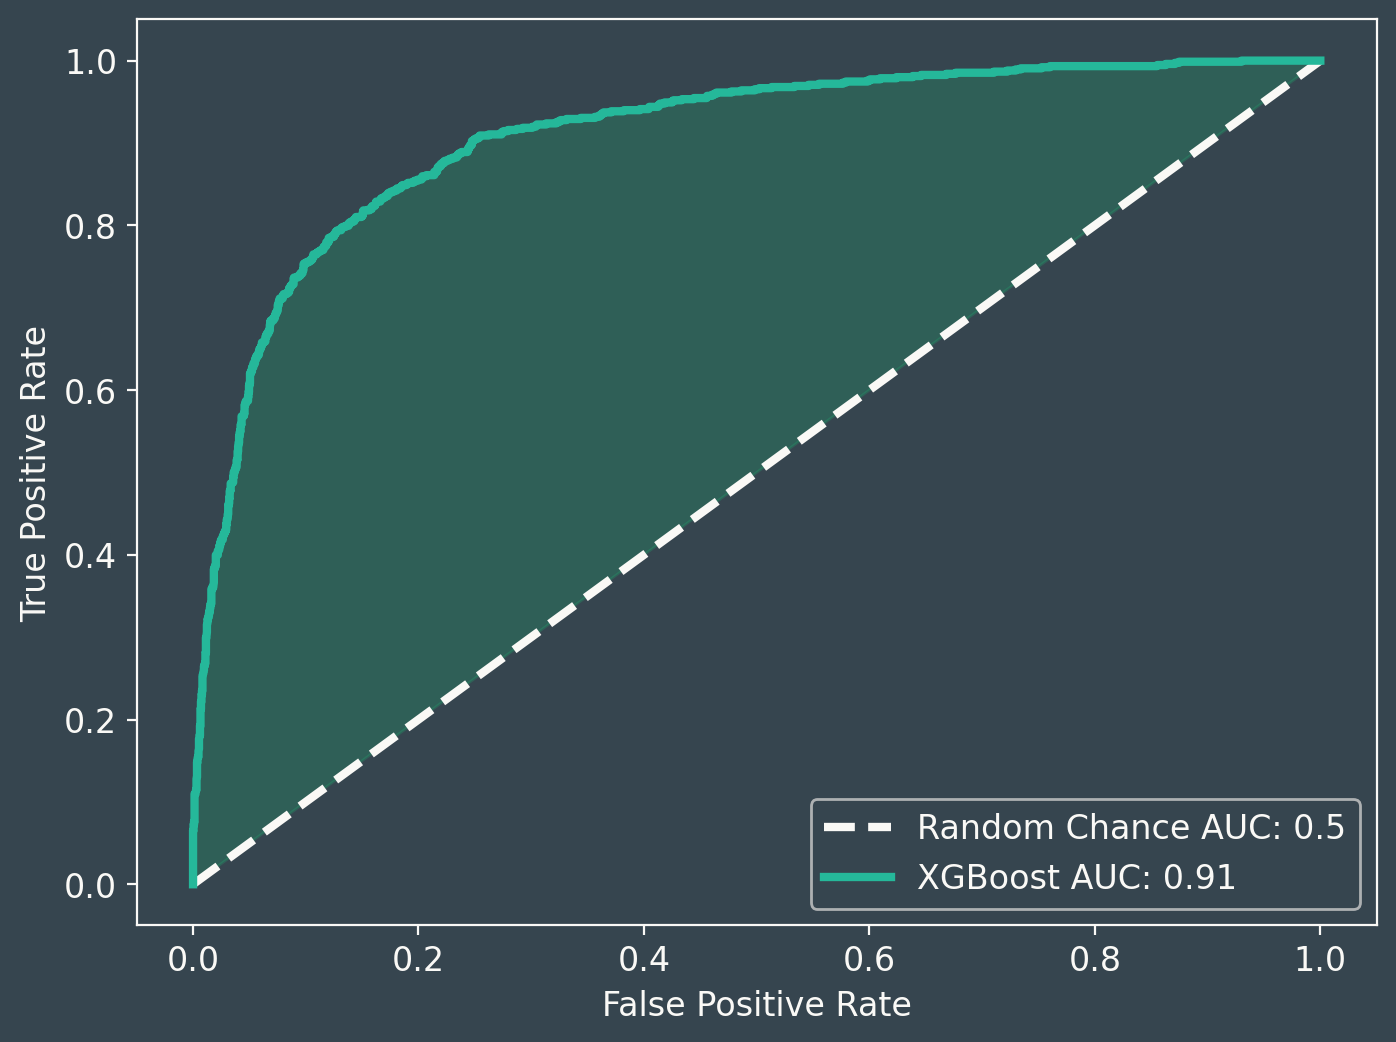

In [14]:
y_score = xg2.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_score)
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.dpi"] = 200
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = "sans seriff"

#25b89a
#17CC79
#36454F - charcoal
#FAF9F6 - off white
plt.figure(facecolor='#36454F')
plt.rc('axes',edgecolor='#FAF9F6')
ax = plt.gca()
ax.set_facecolor('#36454F')

ax.tick_params(axis='x', colors='#FAF9F6')
ax.tick_params(axis='y', colors='#FAF9F6')



plt.plot(fpr, fpr, color = '#FAF9F6', label = 'Random Chance AUC: 0.5', linestyle='dashed', linewidth = 3)
plt.plot(fpr, tpr, color = '#25b89a', label = 'XGBoost AUC: 0.91', linewidth = 3)

plt.xlabel('False Positive Rate', color = '#FAF9F6')
plt.ylabel('True Positive Rate', color = '#FAF9F6')
plt.fill(fpr, tpr, color = '#17CC79', alpha = 0.2)
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('#36454F')
for text in legend.get_texts():
    text.set_color("#FAF9F6")
plt.savefig(f'{FIGURE_PATH}XGB_AUC_lepto.png',bbox_inches='tight',pad_inches = 0.1)

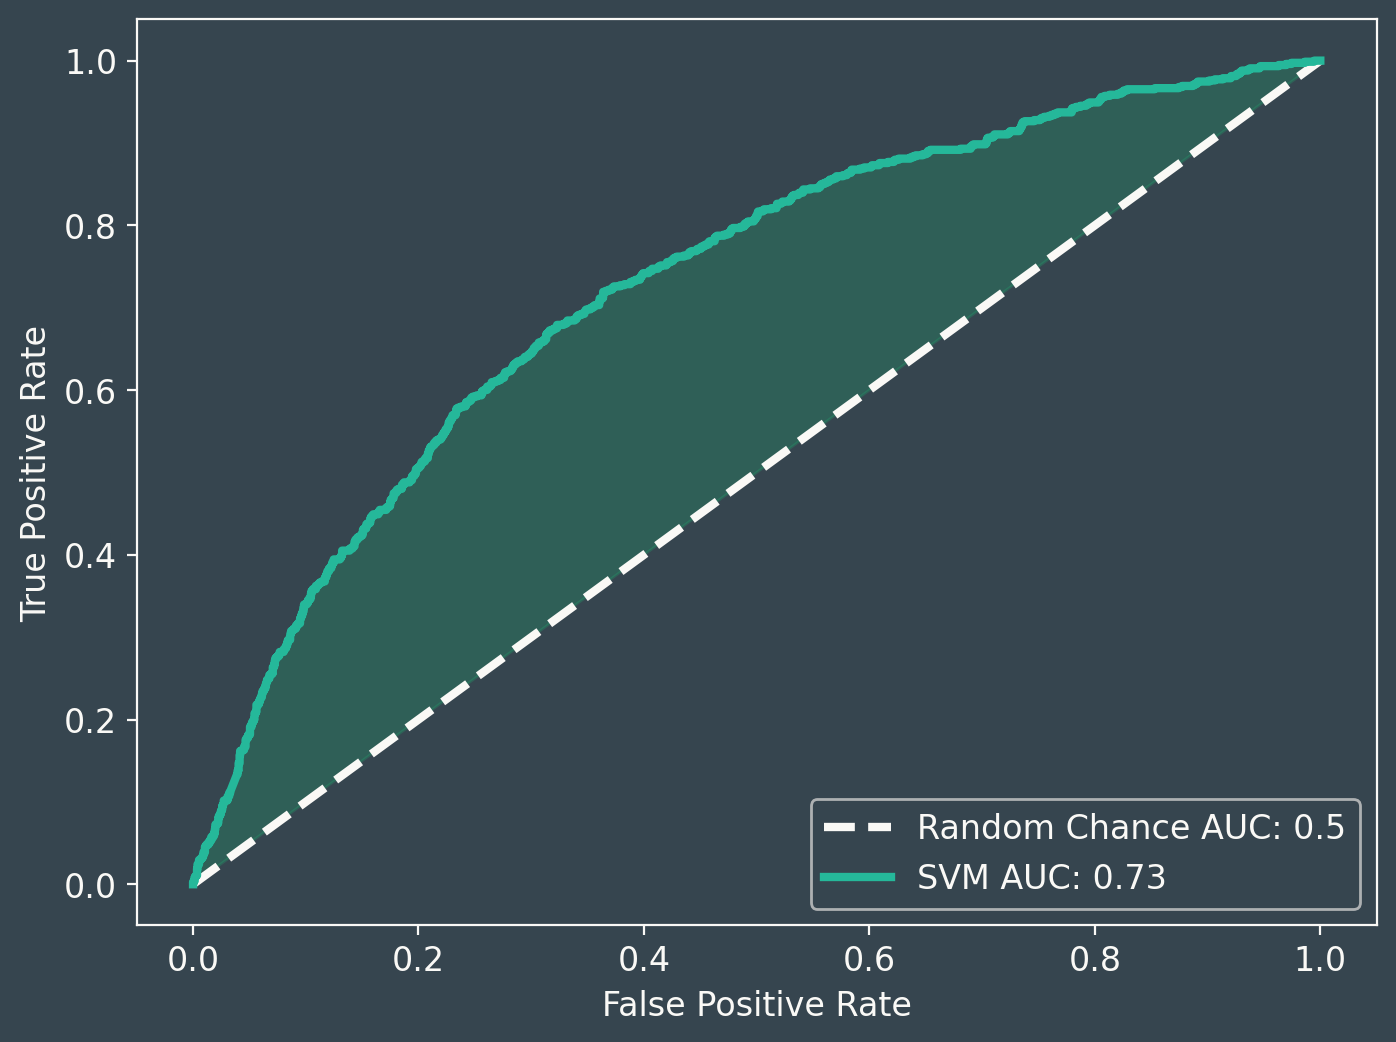

In [9]:
y_score = svm2.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_score)
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.dpi"] = 200
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = "sans seriff"

#25b89a
#17CC79
#36454F - charcoal
#FAF9F6 - off white
plt.figure(facecolor='#36454F')
plt.rc('axes',edgecolor='#FAF9F6')
ax = plt.gca()
ax.set_facecolor('#36454F')

ax.tick_params(axis='x', colors='#FAF9F6')
ax.tick_params(axis='y', colors='#FAF9F6')



plt.plot(fpr, fpr, color = '#FAF9F6', label = 'Random Chance AUC: 0.5', linestyle='dashed', linewidth = 3)
plt.plot(fpr, tpr, color = '#25b89a', label = 'SVM AUC: 0.73', linewidth = 3)

plt.xlabel('False Positive Rate', color = '#FAF9F6')
plt.ylabel('True Positive Rate', color = '#FAF9F6')
plt.fill(fpr, tpr, color = '#17CC79', alpha = 0.2)
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('#36454F')
for text in legend.get_texts():
    text.set_color("#FAF9F6")
plt.savefig(f'{FIGURE_PATH}SVM_AUC_lepto2.png',bbox_inches='tight',pad_inches = 0.1)

In [10]:
# c = ['#f7766c', '#00bb38', '#639dff']
# plt.rcParams["figure.figsize"] = [8, 4]
# plt.rcParams["figure.dpi"] = 200
# plt.rcParams.update({'font.size': 12})
# plt.rcParams['font.family'] = "Times New Roman"

# svm_roc1 = plot_roc_curve(svm1, x_test1, y_test1, label='SVM1 (AUC=0.63)', c='#f8766c')
# xg_roc1 = plot_roc_curve(xg1, x_test1, y_test1, ax=svm_roc1.ax_, label='XGB1 (AUC=0.72)', c='#7cae01')

# svm_roc2 = plot_roc_curve(svm2, x_test2, y_test2, ax=svm_roc1.ax_, label='SVM2 (AUC=0.73)', c='#09bfc5')
# xg_roc2 = plot_roc_curve(xg2, x_test2, y_test2, ax=svm_roc1.ax_, label='XGB2 (AUC=0.91)', c='#c87cff')

# plt.savefig(f'{FIGURE_PATH}AUC_lepto.png',bbox_inches='tight',pad_inches = 0)

In [11]:
#Reading in data
df1 = read_from_drive('https://drive.google.com/file/d/1mYvSC47UW-o54RLQGco4nTTW5rOevpiI/view?usp=sharing')
df1['sirex_bin'] = pd.Series(np.where(df1.Sirex_Presence.values == 'Sirex', 1, 0),df1.index)

df2 = read_from_drive('https://drive.google.com/file/d/1nM4cA8AReB7OJaZUfl04tdSioDnyuKpZ/view?usp=sharing')
df2['sirex_bin'] = pd.Series(np.where(df2.Sirex_Presence.values == 'Sirex', 1, 0),df2.index)

In [12]:
#standardizing data
df1[['Timeframe', 'rainfall', 'temperature_max', 'temperature_min', 'temperature_diff']]= StandardScaler().fit_transform(df1[['Timeframe', 'rainfall', 'temperature_max', 'temperature_min', 'temperature_diff']])
df2[['Timeframe', 'rainfalldiff', 'rainfall', 'rainfallavg', 'temperature_maxdiff', 'temperature_max', 'temperature_maxavg', 'temperature_mindiff', 'temperature_min', 'temperature_minavg', 'temperature_diffdiff', 'temperature_diff', 'temperature_diffavg']]= StandardScaler().fit_transform(df2[['Timeframe', 'rainfalldiff', 'rainfall', 'rainfallavg', 'temperature_maxdiff', 'temperature_max', 'temperature_maxavg', 'temperature_mindiff', 'temperature_min', 'temperature_minavg', 'temperature_diffdiff', 'temperature_diff', 'temperature_diffavg']])

In [13]:
#Creating Subsets
X1 = df1.iloc[:, [2,5,6,7,8,]].values
X1a = df1.iloc[:, [1,2,5,6,7,8,9]].values
Y1 = df1.iloc[:, [9]].values

X2 = df2.iloc[:, [2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]].values
X2a = df2.iloc[:, [2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]].values
Y2 = df2.iloc[:, [17]].values

In [14]:
#splitting into training and test set

x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.25, random_state=0)
scale_pos_weight1 = float(np.round(len(Y1)/sum(Y1),2))

x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.25, random_state=0)
scale_pos_weight2 = float(np.round(len(Y2)/sum(Y2),2))

In [15]:
#Loading models

# svm1 = pickle.load(open(f'{MODEL_PATH}sirex_svm1.pickle', 'rb'))
# xg1 = pickle.load(open(f'{MODEL_PATH}sirex_xgb1.pickle', 'rb'))

svm2 = pickle.load(open(f'{MODEL_PATH}sirex_svm2.pickle', 'rb'))
xg2 = pickle.load(open(f'{MODEL_PATH}sirex_xgb2.pickle', 'rb'))

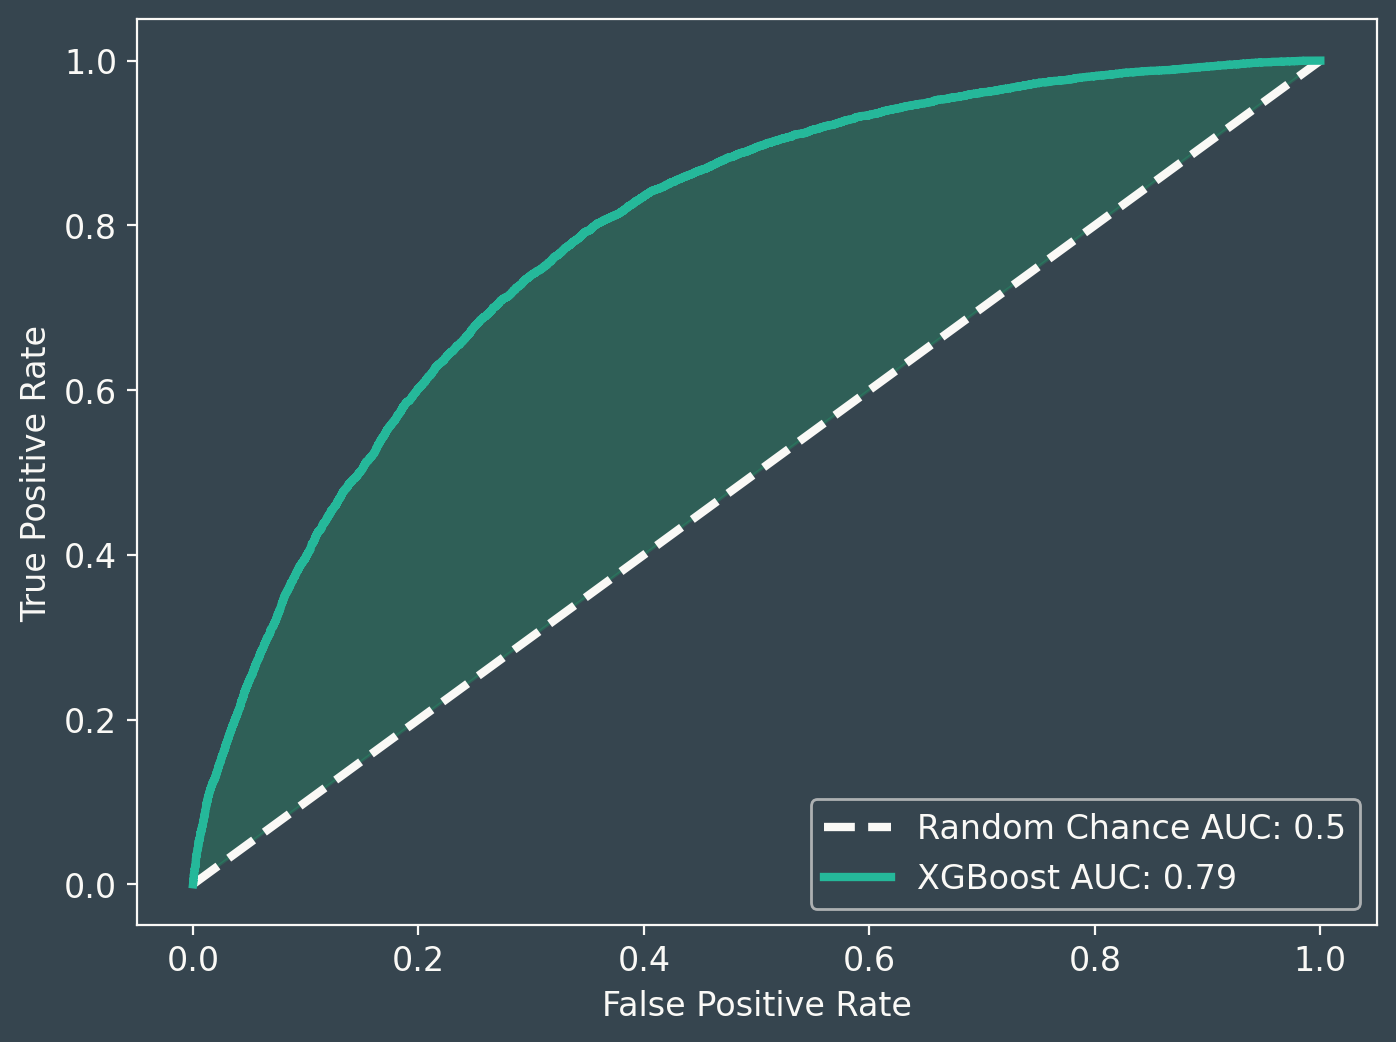

In [16]:
y_score = xg2.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_score)
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.dpi"] = 200
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = "sans seriff"

#25b89a
#17CC79
#36454F - charcoal
#FAF9F6 - off white
plt.figure(facecolor='#36454F')
plt.rc('axes',edgecolor='#FAF9F6')
ax = plt.gca()
ax.set_facecolor('#36454F')

ax.tick_params(axis='x', colors='#FAF9F6')
ax.tick_params(axis='y', colors='#FAF9F6')



plt.plot(fpr, fpr, color = '#FAF9F6', label = 'Random Chance AUC: 0.5', linestyle='dashed', linewidth = 3)
plt.plot(fpr, tpr, color = '#25b89a', label = 'XGBoost AUC: 0.79', linewidth = 3)

plt.xlabel('False Positive Rate', color = '#FAF9F6')
plt.ylabel('True Positive Rate', color = '#FAF9F6')
plt.fill(fpr, tpr, color = '#17CC79', alpha = 0.2)
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('#36454F')
for text in legend.get_texts():
    text.set_color("#FAF9F6")
plt.savefig(f'{FIGURE_PATH}XGB_AUC_sirex.png',bbox_inches='tight',pad_inches = 0.1)

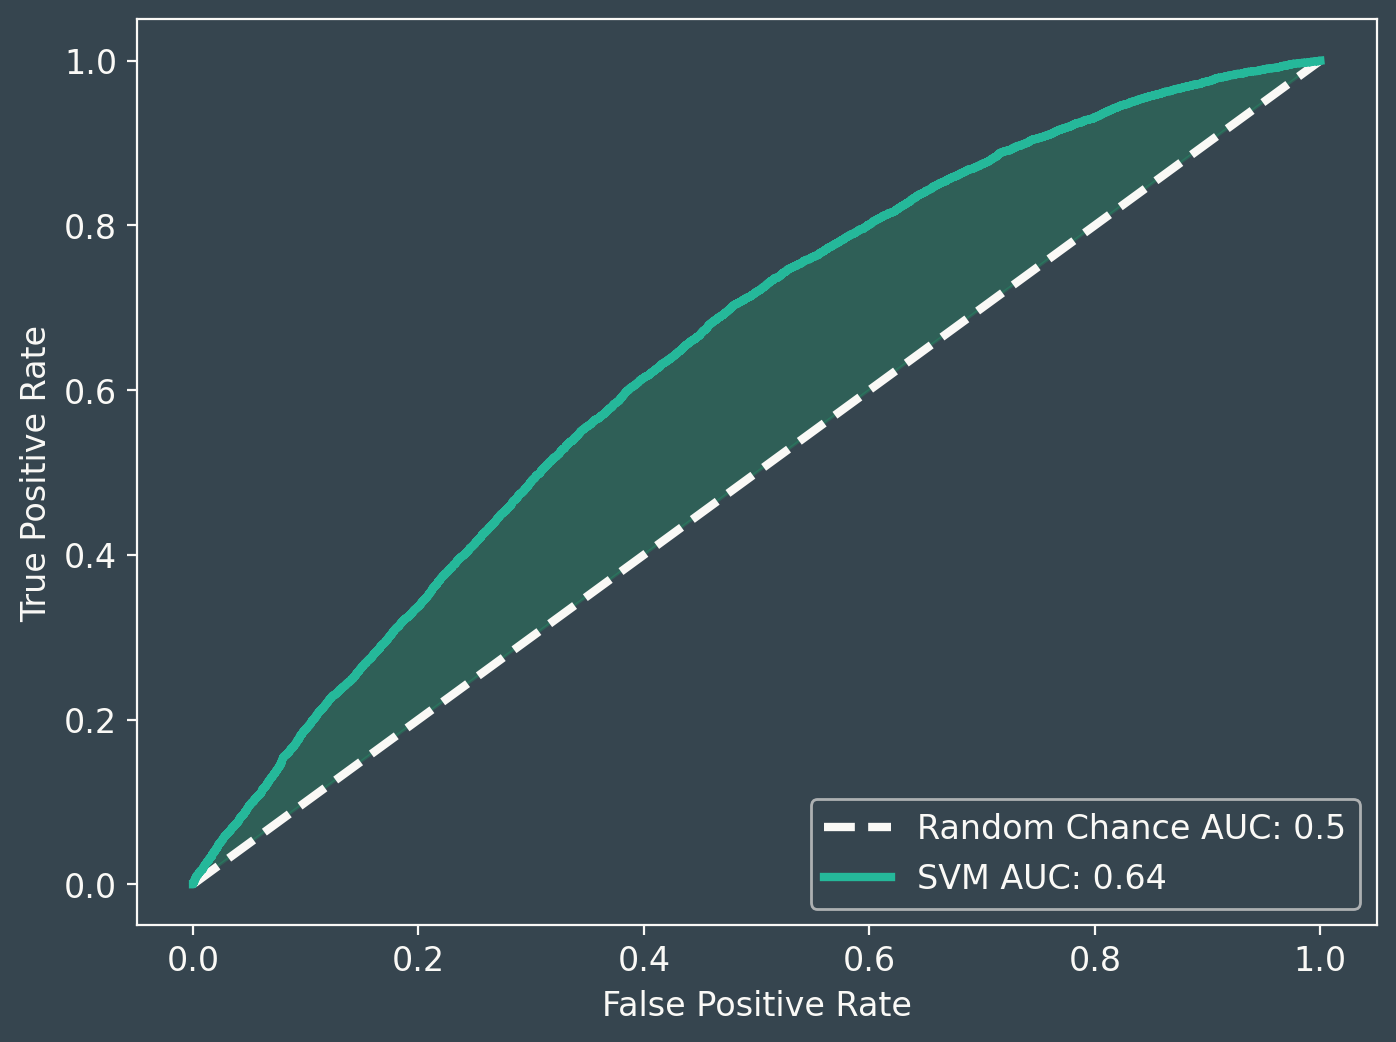

In [17]:
y_score = svm2.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_score)
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.dpi"] = 200
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = "sans seriff"

#25b89a
#17CC79
#36454F - charcoal
#FAF9F6 - off white
plt.figure(facecolor='#36454F')
plt.rc('axes',edgecolor='#FAF9F6')
ax = plt.gca()
ax.set_facecolor('#36454F')

ax.tick_params(axis='x', colors='#FAF9F6')
ax.tick_params(axis='y', colors='#FAF9F6')



plt.plot(fpr, fpr, color = '#FAF9F6', label = 'Random Chance AUC: 0.5', linestyle='dashed', linewidth = 3)
plt.plot(fpr, tpr, color = '#25b89a', label = 'SVM AUC: 0.64', linewidth = 3)

plt.xlabel('False Positive Rate', color = '#FAF9F6')
plt.ylabel('True Positive Rate', color = '#FAF9F6')
plt.fill(fpr, tpr, color = '#17CC79', alpha = 0.2)
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('#36454F')
for text in legend.get_texts():
    text.set_color("#FAF9F6")
plt.savefig(f'{FIGURE_PATH}SVM_AUC_sirex.png',bbox_inches='tight',pad_inches = 0.1)

In [18]:
# c = ['#f7766c', '#00bb38', '#639dff']
# plt.rcParams["figure.figsize"] = [8, 4]
# plt.rcParams["figure.dpi"] = 200
# plt.rcParams.update({'font.size': 12})
# plt.rcParams['font.family'] = "Times New Roman"

# svm_roc1 = plot_roc_curve(svm1, x_test1, y_test1, label='SVM1 (AUC=0.58)', c='#f8766c')
# xg_roc1 = plot_roc_curve(xg1, x_test1, y_test1, ax=svm_roc1.ax_, label='XGB1 (AUC=0.68)', c='#7cae01')

# svm_roc2 = plot_roc_curve(svm2, x_test2, y_test2, ax=svm_roc1.ax_, label='SVM2 (AUC=0.64)', c='#09bfc5')
# xg_roc2 = plot_roc_curve(xg2, x_test2, y_test2, ax=svm_roc1.ax_, label='XGB2 (AUC=0.79)', c='#c87cff')

# plt.savefig(f'{FIGURE_PATH}AUC_sirex.png',bbox_inches='tight',pad_inches = 0)